In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
tickers = ['NFLX', 'AAPL', 'MSFT', 'TSLA', 'NVDA', 'META', 'GOOG', 'AMD']
df = yf.download(tickers, start='2015-12-31')['Adj Close']

df = np.log(1+df.pct_change())
df.head()

[*********************100%***********************]  8 of 8 completed


,AAPL,AMD,GOOG,META,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,,
2015-12-31 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04 00:00:00-05:00,0.000855,-0.035465,-0.022710,-0.023590,-0.012332,-0.039410,-0.018062,-0.071672
2016-01-05 00:00:00-05:00,-0.025379,-0.007246,0.000997,0.004977,0.004552,-0.021139,0.015936,0.000090
2016-01-06 00:00:00-05:00,-0.019764,-0.091318,0.001399,0.002333,-0.018333,0.088991,-0.042229,-0.019844
2016-01-07 00:00:00-05:00,-0.043121,-0.096107,-0.023443,-0.050287,-0.035402,-0.026870,-0.040452,-0.015598


In [16]:
# portfolio return
def portfolio_return(weights):
    return np.dot(df.mean(),weights) * 100

def portfolio_std(weights):
    return (np.dot(np.dot(df.cov(),weights),weights))**(0.5)*np.sqrt(250)

def weight_creator(df):
    rand = np.random.random(len(df.columns))
    rand /= rand.sum()
    return rand

In [17]:
returns = []
stds = []
w = []

for i in range(10000):
    weights = weight_creator(df)
    returns.append(portfolio_return(weights))
    stds.append(portfolio_std(weights))
    w.append(weights)

In [18]:
data = {'Returns':returns, 'Volatility':stds}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in w]

portfolios = pd.DataFrame(data)

risk_free_r = yf.download('^TNX')['Close'][-1] / 100
portfolios['Sharpe'] = (portfolios['Returns']-risk_free_r)/portfolios['Volatility']

portfolios.head()

[*********************100%***********************]  1 of 1 completed


,Returns,Volatility,AAPL weight,AMD weight,GOOG weight,META weight,MSFT weight,NFLX weight,NVDA weight,TSLA weight,Sharpe
0,0.106447,0.329246,0.203091,0.191377,0.094554,0.086281,0.026138,0.207562,0.053870,0.137127,0.203183
1,0.106883,0.312970,0.198684,0.185299,0.173267,0.057065,0.118409,0.128288,0.117797,0.021191,0.215140
2,0.116704,0.322827,0.248665,0.066720,0.027839,0.042489,0.156547,0.102218,0.163321,0.192201,0.238995
3,0.112926,0.326392,0.177101,0.223996,0.180092,0.022888,0.073271,0.142667,0.099392,0.080591,0.224811
4,0.092003,0.304273,0.148730,0.066777,0.092729,0.149844,0.160649,0.203604,0.105540,0.072128,0.172388


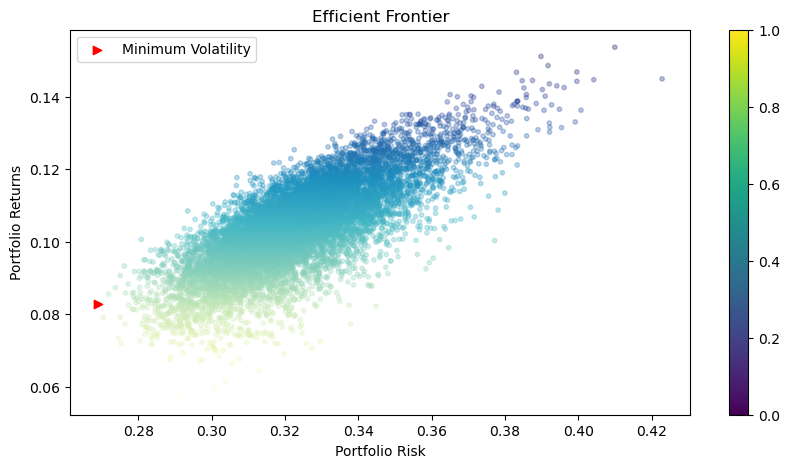

In [22]:
plt.figure(figsize=(10,5))

plt.scatter(stds,returns,c=returns,cmap='YlGnBu', marker='o', s=10, alpha=0.3)
plt.scatter(min(stds),returns[stds.index(min(stds))],c='r',marker='>',label='Minimum Volatility')
plt.colorbar()

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Risk')
plt.ylabel('Portfolio Returns')
plt.legend()